In [1]:
#Esin ERSOĞAN
#708191001
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold
##########################
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
df2m = pd.read_csv("train2_modified.csv") #will be used in Part D
test1 = pd.read_csv("test1.csv") 
test2 = pd.read_csv("test2.csv") 

## Part A: Examine training sets

#### Covariance Matrix Plots:
- For each class in the Dataset1 and Dataset2, the covariance matrices are calculated and visualized. These charts show us the dependency between two features:
   - In the Dataset1: 
       - It seems from the chart that the dependency between feature x1 and feature x2 for each classes is small, under 0.5.
       - The dependency between feature x1 and feature x2 are the same both in the class 0 and class 1.
       - The variances of two features in each class are the same. 
   - In the Dataset2: 
       - It seems from the chart that the dependency between feature x1 anf feature x2 for each class is a bit bigger than the one in the Dataset1, above 0.5.
       - The dependency between feature x1 and feature x2 is higher in the class 0 than the class 1.
       - The variance of the feature x1 and x2 in the class 0 is higher than the class 1.


#### Histogram Plots:
- A histogram plot is drawn for each class in the Dataset1 and Dataset2. It shows the overlapping between the classes on the basis of the features:
    - In the Dataset1: The overlapping between class 0 and 1 in the feature x2 is higher than the one in x1 feature.
    - In the Dataset2: The overlapping between class 0 and 1 is higher than the one in Dataset1.

#### Scatter Plots: 
- A scatter plot is drawn for each Dataset, Dataset1 and Dataset2. It shows the overlapping between the classes.
    - The overlapping between class 0 and 1 in Dataset2 is higher than the one in the Dataset1.


[Text(0, 0, ''), Text(0, 0, 'x1'), Text(0, 0, 'x2')]

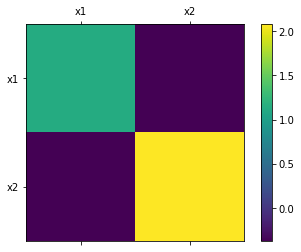

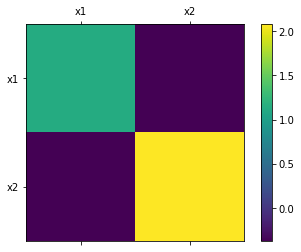

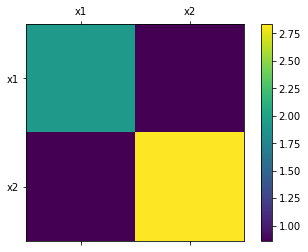

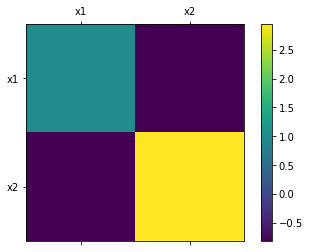

In [2]:
#PART A: Examine training sets here. plots etc.

#---For Dataset1---#
df1_c0 = df1.loc[df1[df1.keys().values[2]] == 0]
df1_c1 = df1.loc[df1[df1.keys().values[2]] == 1]

df1_c0.reset_index(drop=True, inplace=True)
df1_c1.reset_index(drop=True, inplace=True)

df1_c0_x1 = df1_c0[df1_c0.keys().values[0]] #x1_c0
df1_c1_x1 = df1_c1[df1_c1.keys().values[0]] #x1_c1

df1_c0_x2 = df1_c0[df1_c0.keys().values[1]] #x2_c0
df1_c1_x2 = df1_c1[df1_c1.keys().values[1]] #x2_c1

#For Class 0
df1_c0_mean = np.zeros((2,1));
df1_c0_mean[0][0] = df1_c0_x1.mean()
df1_c0_mean[1][0] = df1_c0_x2.mean()

df1_c0_cov = np.zeros((2,2));

df1_c0_cov[0][0] = sum((pow(x-df1_c0_mean[0][0],2) for x in df1_c0_x1))/len(df1_c0_x1)
df1_c0_cov[1][1] = sum((pow(x-df1_c0_mean[1][0],2) for x in df1_c0_x2))/len(df1_c0_x2)

total=0
for i in range(0, len(df1_c0)):
    total = total + ((df1_c0['x1'][i]-df1_c0_mean[0][0])*(df1_c0['x2'][i]-df1_c0_mean[1][0]))

df1_c0_cov[0][1] = df1_c0_cov[1][0] = total/len(df1_c0)

alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(df1_c0_cov,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)


#For Class 1
df1_c1_mean = np.zeros((2,1));
df1_c1_mean[0][0] = df1_c1_x1.mean()
df1_c1_mean[1][0] = df1_c1_x2.mean()

df1_c1_cov = np.zeros((2,2));

df1_c1_cov[0][0] = sum((pow(x-df1_c1_mean[0][0],2) for x in df1_c1_x1))/len(df1_c1_x1)
df1_c1_cov[1][1] = sum((pow(x-df1_c1_mean[1][0],2) for x in df1_c1_x2))/len(df1_c1_x2)

total=0
for i in range(0, len(df1_c1)):
    total = total + ((df1_c1['x1'][i]-df1_c1_mean[0][0])*(df1_c1['x2'][i]-df1_c1_mean[1][0]))

df1_c1_cov[0][1] = df1_c1_cov[1][0] = total/len(df1_c1)

alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(df1_c1_cov,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)



#---For Dataset2---#
df2_c0 = df2.loc[df2[df2.keys().values[2]] == 0]
df2_c1 = df2.loc[df2[df2.keys().values[2]] == 1]

df2_c0.reset_index(drop=True, inplace=True)
df2_c1.reset_index(drop=True, inplace=True)

df2_c0_x1 = df2_c0[df2_c0.keys().values[0]] #x1_c0
df2_c1_x1 = df2_c1[df2_c1.keys().values[0]] #x1_c1

df2_c0_x2 = df2_c0[df2_c0.keys().values[1]] #x2_c0
df2_c1_x2 = df2_c1[df2_c1.keys().values[1]] #x2_c1

#For Class 0
df2_c0_mean = np.zeros((2,1));
df2_c0_mean[0][0] = df2_c0_x1.mean()
df2_c0_mean[1][0] = df2_c0_x2.mean()

df2_c0_cov = np.zeros((2,2));

df2_c0_cov[0][0] = sum((pow(x-df2_c0_mean[0][0],2) for x in df2_c0_x1))/len(df2_c0_x1)
df2_c0_cov[1][1] = sum((pow(x-df2_c0_mean[1][0],2) for x in df2_c0_x2))/len(df2_c0_x2)

total=0
for i in range(0, len(df2_c0)):
    total = total + ((df2_c0['x1'][i]-df2_c0_mean[0][0])*(df2_c0['x2'][i]-df2_c0_mean[1][0]))

df2_c0_cov[0][1] = df2_c0_cov[1][0] = total/len(df2_c0)

alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(df2_c0_cov,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)


#For Class 1
df2_c1_mean = np.zeros((2,1));
df2_c1_mean[0][0] = df2_c1_x1.mean()
df2_c1_mean[1][0] = df2_c1_x2.mean()

df2_c1_cov = np.zeros((2,2));

df2_c1_cov[0][0] = sum((pow(x-df2_c1_mean[0][0],2) for x in df2_c1_x1))/len(df2_c1_x1)
df2_c1_cov[1][1] = sum((pow(x-df2_c1_mean[1][0],2) for x in df2_c1_x2))/len(df2_c1_x2)

total=0
for i in range(0, len(df2_c1)):
    total = total + ((df2_c1['x1'][i]-df2_c1_mean[0][0])*(df2_c1['x2'][i]-df2_c1_mean[1][0]))

df2_c1_cov[0][1] = df2_c1_cov[1][0] = total/len(df2_c1)

alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(df2_c1_cov,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)



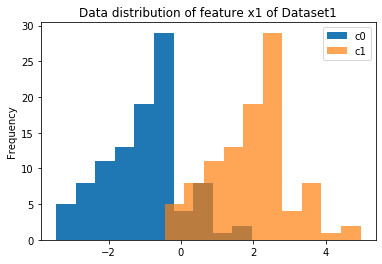

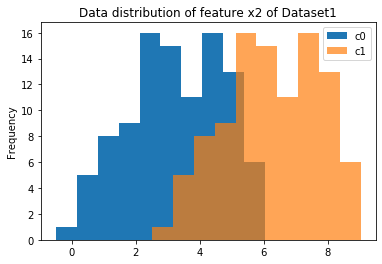

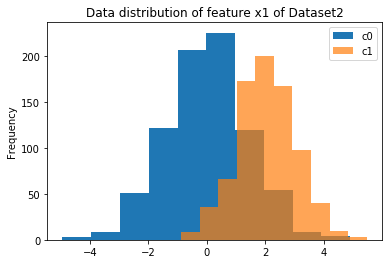

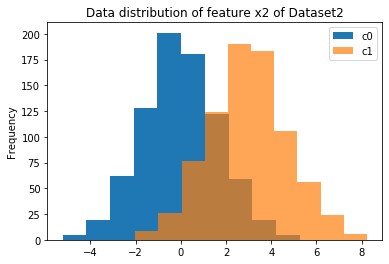

In [3]:
#---Plot histograms---#

#For Dataset1
df1_c0 = df1.loc[df1[df1.keys().values[2]] == 0]
df1_c1 = df1.loc[df1[df1.keys().values[2]] == 1]

df1_x1c0 = df1_c0[df1_c0.keys().values[0]] #x1_c0
df1_x1c1 = df1_c1[df1_c1.keys().values[0]] #x1_c1

df1_x2c0 = df1_c0[df1_c0.keys().values[1]] #x2_c0
df1_x2c1 = df1_c1[df1_c1.keys().values[1]] #x2_c1

c0 = plt.hist((df1_x1c0.values), label=['c0'])
c1 = plt.hist((df1_x1c1.values), label=['c1'], alpha=0.7)
plt.gca().set(title='Data distribution of feature x1 of Dataset1', ylabel='Frequency')
plt.legend()
plt.show()

plt.hist((df1_x2c0.values), label=['c0'])
plt.hist((df1_x2c1.values), label=['c1'], alpha=0.7)
plt.gca().set(title='Data distribution of feature x2 of Dataset1', ylabel='Frequency')
plt.legend()
plt.show()

#For Dataset2
df2_c0 = df2.loc[df2[df2.keys().values[2]] == 0]
df2_c1 = df2.loc[df2[df2.keys().values[2]] == 1]

df2_x1c0 = df2_c0[df2_c0.keys().values[0]] #x1_c0
df2_x1c1 = df2_c1[df2_c1.keys().values[0]] #x1_c1

df2_x2c0 = df2_c0[df2_c0.keys().values[1]] #x2_c0
df2_x2c1 = df2_c1[df2_c1.keys().values[1]] #x2_c1

plt.hist((df2_x1c0.values), label=['c0'])
plt.hist((df2_x1c1.values), label=['c1'], alpha=0.7)
plt.gca().set(title='Data distribution of feature x1 of Dataset2', ylabel='Frequency')
plt.legend()
plt.show()

plt.hist((df2_x2c0.values), label=['c0'])
plt.hist((df2_x2c1.values), label=['c1'], alpha=0.7)
plt.gca().set(title='Data distribution of feature x2 of Dataset2', ylabel='Frequency')
plt.legend()
plt.show()

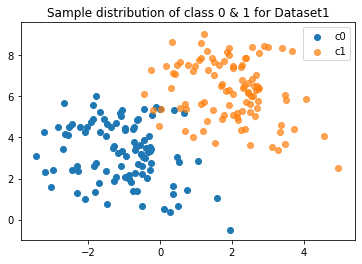

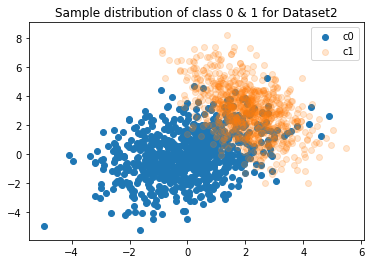

In [4]:
#---Plot scatters---#

#For Dataset1
plt.scatter(df1_x1c0, df1_x2c0, label='c0')
plt.scatter(df1_x1c1, df1_x2c1, label='c1', alpha=0.7)
plt.gca().set(title='Sample distribution of class 0 & 1 for Dataset1')
plt.legend()
plt.show()

#For Dataset2
plt.scatter(df2_x1c0, df2_x2c0, label='c0')
plt.scatter(df2_x1c1, df2_x2c1, label='c1', alpha=0.2)
plt.gca().set(title='Sample distribution of class 0 & 1 for Dataset2')
plt.legend()
plt.show()

## Part B: Implement Naive Bayes Classifier
#### In this part, Naive Bayes Classifier is implemented with the steps below:

Three functions have been created for this purpose:
- trainBayes
- trainAndTest
- calculateErrorRate

#### In the trainBayes function:
- This function takes one parameter:
    - trainingSamples: Used to train the Bayes classifier.
- The samples in the dataset is seperated according to the class they belong to.
- Class probabilities are calculated.
- Mean and covariance matrices for each class are calculated.
- The covarince matrices are checked whether they are invertible or not. If the covariance matrix is not invertible, then the pseudo-inverse of the matrix is calculated.
- The discriminant functions are calculated for each class with different approaches for three cases which are:
    - Case1: Different means but equal covariance matrices (μ1 ̸= μ2 and Σ1 = Σ2): The discriminant function of this case is implemented as two parts: 
        - The first part: the row vector part which will be used to multiply with the feature vector [x1, x2]
        - The second part: the constant value
    - Case2: For each class, the covariance matrix has constant vari- ances across features within each class and satisfies: Σ1 = σ12I; Σ2 = σ2I: The discriminant function of this case is implemented as two parts:
        - The first part: the row vector part which will be used to multiply with the feature vector [x1, x2]
        - The second part: the row vector part which will be used to multiply with the feature vector [x1, x2]
    - General Case: General case where the covariance matrix of each class is arbitrary: The discriminant function of this case is implemented as three parts:
        - The first part: The inverse matrix of the covariance matrix which will be used multiplication with the tranpose of the feature vector [x1, x2] and the multiplication with the feature vector itself.
        - The second part: the row vector part which will be used to multiply with the feature vector [x1, x2]
        - The third part: the row vector part which will be used to multiply with the feature vector [x1, x2]
  
- The whole parts of the discriminant function is returned as the function output. These parts are returned distinctively because of their usage will be differ. 


#### In the trainAndTest function:
- This function takes two parameters:
    - trainSamples: Used to train the Bayes classifier.
    - testSamples: Used to test the Bayes classifier.
- trainBayes function is called with the parameter of trainTest: 
    - this function is returned the discriminant function for each class.
- The rows in the testSample is extracted as feature vectors in order and each processed in the following steps:
    - The values of discriminat function for each class is obtained from the feature vector
    - The results of these discriminant functions are compared
    - The data is assgined as the class which has the bigger result
    - The results of the predictions are added to the predictedLabels
- The predictedLabels list is returned as output.

#### In the calculateErrorRate function:
- This function takes two parameters:
    - actualLabels: The ground-truth labels of the data.
    - predictedLabels: The predictions of the Bayes classifier.
- The actualLabels and predictedLabels are compared and the differences as considered as misclassifications.
- The misclassification rate is calculated and returned as the output.


#### The flow after the functions were defined:
- The functions are called in the order that for both Dataset1&Test1 and Dataset2&Test2:
    - trainAndTest( ):
        - trainBayes( )
    - calculateErrorRate( )

In [5]:
#Implement PART B:

def trainBayes(trainingSamples):
    c0 = trainingSamples.loc[trainingSamples[trainingSamples.keys().values[2]] == 0]
    c1 = trainingSamples.loc[trainingSamples[trainingSamples.keys().values[2]] == 1]
    
    c0.reset_index(drop=True, inplace=True)
    c1.reset_index(drop=True, inplace=True)
    
    c0_x1 = c0[c0.keys().values[0]] #x1_c0
    c1_x1 = c1[c1.keys().values[0]] #x1_c1
    
    c0_x2 = c0[c0.keys().values[1]] #x2_c0
    c1_x2 = c1[c1.keys().values[1]] #x2_c1
    
    c0_p = len(c0)/len(trainingSamples)
    c1_p = len(c1)/len(trainingSamples)
    
    #Class0
    c0_mean = np.zeros((2,1));
    c0_mean[0][0] = c0_x1.mean()
    c0_mean[1][0] = c0_x2.mean()
    
    c0_cov = np.zeros((2,2));
    
    c0_cov[0][0] = sum((pow(x-c0_mean[0][0],2) for x in c0_x1))/len(c0_x1)
    c0_cov[1][1] = sum((pow(x-c0_mean[1][0],2) for x in c0_x2))/len(c0_x2)
    
    total=0
    for i in range(0, len(c0)):
        total = total + ((c0['x1'][i]-c0_mean[0][0])*(c0['x2'][i]-c0_mean[1][0]))
    
    c0_cov[0][1] = c0_cov[1][0] = total/len(c0)
    
    print("Covariance matrix for class 0: \n", c0_cov)
    
    #Class1
    c1_mean = np.zeros((2,1));
    c1_mean[0][0] = c1_x1.mean()
    c1_mean[1][0] = c1_x2.mean()
    
    c1_cov = np.zeros((2,2));
    
    c1_cov[0][0] = sum((pow(x-c1_mean[0][0],2) for x in c1_x1))/len(c1_x1)
    c1_cov[1][1] = sum((pow(x-c1_mean[1][0],2) for x in c1_x2))/len(c1_x2)
    
    total=0
    for i in range(0, len(c1)):
        total = total + ((c1['x1'][i]-c1_mean[0][0])*(c1['x2'][i]-c1_mean[1][0]))
    
    c1_cov[0][1] = c1_cov[1][0] = total/len(c1)
    
    print("Covariance matrix for class 1: \n", c1_cov)
    
    g0wii = 0
    g1wii = 0
    
    #To handle non-invertible matrices
    if(c0_cov.shape[0] != c0_cov.shape[1] or np.linalg.matrix_rank(c0_cov) != c0_cov.shape[0]): 
        c0_cov_inv = np.linalg.pinv(c0_cov)
    else:
        c0_cov_inv = np.linalg.inv(c0_cov)
        
    if(c1_cov.shape[0] != c1_cov.shape[1] or np.linalg.matrix_rank(c1_cov) != c1_cov.shape[0]):
        c1_cov_inv = np.linalg.pinv(c1_cov)
    else:
        c1_cov_inv = np.linalg.inv(c1_cov)
    
    if(np.allclose(c0_cov,c1_cov)): #Case1
        g0wi = np.matmul(np.transpose(c0_mean),c0_cov_inv) #discriminant function part1: is used as raw vector which will be multiplied with the x vector
        g0w0 = math.log(c0_p) - (np.matmul(np.matmul(np.transpose(c0_mean), c0_cov_inv), c0_mean))/2 #discriminant function part2: constant part
        g1wi = np.matmul(np.transpose(c1_mean),c1_cov_inv)
        g1w0 = math.log(c1_p) - (np.matmul(np.matmul(np.transpose(c1_mean), c1_cov_inv), c0_mean))/2
    elif(np.all(np.equal(c0_cov/c0_cov[0][0], np.eye(2))) and np.all(np.equal(c1_cov/c1_cov[0][0], np.eye(2)))): #Case2
        sigma0 = c0_cov[0][0]
        sigma1 = c1_cov[0][0]
        g0wi = np.transpose(c0_mean)/sigma0
        g0w0 = math.log(c0_p) - (np.matmul(np.transpose(c0_mean), c0_mean), c0_mean)/(2 * sigma0)
        g1wi = np.transpose(c1_mean)/sigma1
        g1w0 = math.log(c1_p) - (np.matmul(np.transpose(c1_mean), c1_mean), c0_mean)/(2 * sigma1)
    else: #General Case
        g0wii = -(np.linalg.inv(c0_cov)/2)
        g0wi = np.matmul(np.transpose(c0_mean),c0_cov_inv)
        g0w0 = math.log(c0_p) - (np.matmul(np.matmul(np.transpose(c0_mean), c0_cov_inv), c0_mean))/2
        g1wii = -(np.linalg.inv(c1_cov)/2)
        g1wi = np.matmul(np.transpose(c1_mean),c1_cov_inv)
        g1w0 = math.log(c1_p) - (np.matmul(np.matmul(np.transpose(c1_mean), c1_cov_inv), c0_mean))/2
    
        #Matrix part: To handle negative numbers: ...explain it...
        #np.asarray(c0_cov)[np.asarray(c0_cov)<0] += 2.71828 
        #np.asarray(c1_cov)[np.asarray(c1_cov)<0] += 2.71828
        #c0_cov_log = np.log(np.asarray(c0_cov))
        #c1_cov_log = np.log(np.asarray(c1_cov))
        #g0wm = -(c0_cov_log/2)
        #g1wm = -(c1_cov_log/2)
    
    return [g0wi, g0w0, g1wi, g1w0, g0wii, g1wii]

def trainAndTest(trainSamples, testSamples):
    [g0wi, g0w0, g1wi, g1w0, g0wii, g1wii] = trainBayes(trainSamples)
    
    testRow = np.zeros((2,1));
    predictedLabels = []
    
    for index, row in testSamples.iterrows():
        testRow[0][0] = row['x1']
        testRow[1][0] = row['x2']
        
        p_c0 = np.matmul(g0wi, testRow) + g0w0
        p_c1 = np.matmul(g1wi, testRow) + g1w0
        
        if isinstance(g0wii, (list,pd.core.series.Series,np.ndarray)): #this means g0wm has been taken a matris value in general case block
            p_c0 = p_c0 + np.matmul(np.matmul(np.transpose(testRow), g0wii), testRow)
            #np.all(np.linalg.eigvals(g0wm-g1wm) > 0)
        if isinstance(g1wii, (list,pd.core.series.Series,np.ndarray)):
            p_c1 = p_c1 + np.matmul(np.matmul(np.transpose(testRow), g1wii), testRow)
            
        if (p_c0 > p_c1):
            predictedLabels.append(0)
        else:
            predictedLabels.append(1)
    
    return predictedLabels
    
def calculateErrorRate(actualLabels, predictedLabels):
    misClassified = 0
    index = 0
    
    for index, x in enumerate(predictedLabels):
        if(predictedLabels[index] != actualLabels[index]):
            misClassified += 1
    
    c = (misClassified/len(actualLabels)) * 100
    return c


#Test1
actualLabels = test1[test1.keys().values[2]].tolist()
predictedLabels = trainAndTest(df1, test1)
errorRate1 = calculateErrorRate(actualLabels, predictedLabels)

#Test2
actualLabels = test2[test2.keys().values[2]].tolist()
predictedLabels = trainAndTest(df2, test2)
errorRate2 = calculateErrorRate(actualLabels, predictedLabels)

print('The error rate for Dataset1: ', errorRate1)
print('The error rate for Dataset2: ', errorRate2)

Covariance matrix for class 0: 
 [[ 1.13557089 -0.37320387]
 [-0.37320387  2.08327195]]
Covariance matrix for class 1: 
 [[ 1.13557089 -0.37320387]
 [-0.37320387  2.08327195]]
Covariance matrix for class 0: 
 [[1.91970895 0.85690451]
 [0.85690451 2.83579458]]
Covariance matrix for class 1: 
 [[ 0.99645235 -0.81777973]
 [-0.81777973  2.94594199]]
The error rate for Dataset1:  34.0
The error rate for Dataset2:  27.750000000000004


## Part C: Implement K-Fold Cross Validation
#### 5-fold cross validation function is implemented:
- The Dataset1&Test1 and Dataset2&Test2 sets are concatenated.
- The whole dataset is divided into 5 parts:
    - In each iteration, one part is leaved for test set and this part is dropped out from the whole dataset to obtain the training set.
    - In the end of each iteration, a classification error rate is calculated, this classification error rates are added a list to take the average of all of these error rates.
- After all of these iterations are completed, the average of these misclassification error rates is calculated.

In [6]:
#Implement PART C:
def kfoldCV(dataset):    
    misClassifiedCV = []
    kf = KFold(n_splits=5, random_state=1)
    for trainSamples, testSamples in kf.split(dataset):
        trainDf = dataset.copy()
        trainDf.drop(trainDf.index[testSamples[0]:testSamples[-1]+1], inplace=True)
        testDf = dataset[testSamples[0]:testSamples[-1]+1]
        
        actualLabels = testDf[testDf.keys().values[2]].tolist()
        predictedLabels = trainAndTest(trainDf, testDf[['x1', 'x2']])
        misClassifiedCV.append(calculateErrorRate(actualLabels, predictedLabels))
    
    avgErrorRate = sum(misClassifiedCV)/len(misClassifiedCV)
    
    return avgErrorRate


#5-fold cv: Test1
frames = [df1, test1]
cv_df1 = pd.concat(frames, ignore_index=True)
cvErrorRate1 = kfoldCV(cv_df1)

#5-fold cv: Test2
frames = [df2, test2]
cv_df2 = pd.concat(frames, ignore_index=True)
cvErrorRate2 = kfoldCV(cv_df2)

print('The average error rate using 5-CV for Dataset1: ', cvErrorRate1)
print('The average error rate using 5-CV for Dataset2: ', cvErrorRate2)


Covariance matrix for class 0: 
 [[ 1.18637112 -0.53162699]
 [-0.53162699  2.47111468]]
Covariance matrix for class 1: 
 [[ 1.17991903 -0.38651008]
 [-0.38651008  2.36491308]]
Covariance matrix for class 0: 
 [[ 1.10206354 -0.44832516]
 [-0.44832516  2.35054559]]
Covariance matrix for class 1: 
 [[ 1.22293492 -0.56760505]
 [-0.56760505  2.36619996]]
Covariance matrix for class 0: 
 [[ 1.14630058 -0.50552572]
 [-0.50552572  2.3482123 ]]
Covariance matrix for class 1: 
 [[ 1.13153294 -0.59744288]
 [-0.59744288  2.4683008 ]]
Covariance matrix for class 0: 
 [[ 1.19839177 -0.43267474]
 [-0.43267474  2.2472595 ]]
Covariance matrix for class 1: 
 [[ 1.14313253 -0.34964342]
 [-0.34964342  2.17189619]]
Covariance matrix for class 0: 
 [[ 1.17439552 -0.47765809]
 [-0.47765809  2.30539349]]
Covariance matrix for class 1: 
 [[ 1.14141409 -0.50803735]
 [-0.50803735  2.36548043]]
Covariance matrix for class 0: 
 [[1.98830202 1.03331799]
 [1.03331799 2.99880064]]
Covariance matrix for class 1: 
 [[ 

## Part D: Redo the experiments on modified Dataset 2

- The experiments which is implemented in Part B is applied on Dataset2 modified with random single partition of data.

### In comparision with Dataset2: 
- In the dataset2_modified: 
    - This dataset contains some outlier samples for each class.

### Compare the results of Dataset2 in Part B:
- The result of the classifier trained by the Dataset2_modified does not differ from the result of the classifier trained by the Dataset2, they are equal. 
- We can conclude that the effect of the presence of the outliers is minimal in the Bayes classifier, in this example it has no effect at all.

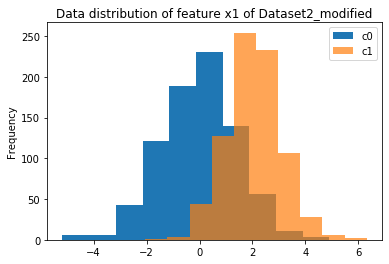

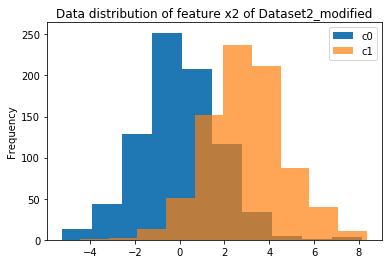

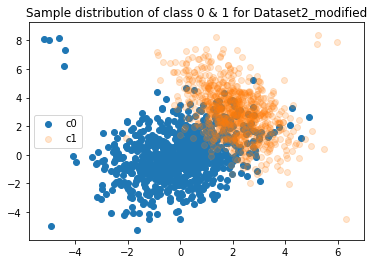

Covariance matrix for class 0: 
 [[2.04588459 0.63042127]
 [0.63042127 3.17419239]]
Covariance matrix for class 1: 
 [[ 1.07756488 -0.77916391]
 [-0.77916391  3.09420853]]
The error rate for dataset2 modified:  27.750000000000004


In [7]:
#Implement Part D:

#For Dataset2 Modified
#Hisogram plots
df2m_c0 = df2m.loc[df2m[df2m.keys().values[2]] == 0]
df2m_c1 = df2m.loc[df2m[df2m.keys().values[2]] == 1]

df2m_x1c0 = df2m_c0[df2m_c0.keys().values[0]] #x1_c0
df2m_x1c1 = df2m_c1[df2m_c1.keys().values[0]] #x1_c1

df2m_x2c0 = df2m_c0[df2m_c0.keys().values[1]] #x2_c0
df2m_x2c1 = df2m_c1[df2m_c1.keys().values[1]] #x2_c1

plt.hist((df2m_x1c0.values), label=['c0'])
plt.hist((df2m_x1c1.values), label=['c1'], alpha=0.7)
plt.gca().set(title='Data distribution of feature x1 of Dataset2_modified', ylabel='Frequency')
plt.legend()
plt.show()

plt.hist((df2m_x2c0.values), label=['c0'])
plt.hist((df2m_x2c1.values), label=['c1'], alpha=0.7)
plt.gca().set(title='Data distribution of feature x2 of Dataset2_modified', ylabel='Frequency')
plt.legend()
plt.show()

plt.scatter(df2m_x1c0, df2m_x2c0, label='c0')
plt.scatter(df2m_x1c1, df2m_x2c1, label='c1', alpha=0.2)
plt.gca().set(title='Sample distribution of class 0 & 1 for Dataset2_modified')
plt.legend()
plt.show()

#Train and test the Bayes for the Dataset2_modified
actualLabels = test2[test2.keys().values[2]].tolist()
predictedLabels = trainAndTest(df2m, test2)
errorRate2m = calculateErrorRate(actualLabels, predictedLabels)

print('The error rate for dataset2 modified: ', errorRate2m)